# Learning MNIST Dataset through CNN Model using tensorflow.keras

In [1]:
# load MNIST Datasets and check the shape
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# reshape images. 28*28 size with 1 color channel
train_images = train_images.reshape((-1, 28, 28, 1)) # 60000
test_images = test_images.reshape((-1, 28, 28, 1)) # 10000
print(train_images.shape)

# Normalize pixel value in 0~1 / One-hot Encoding label
train_images, test_images = train_images / 255, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)
print(train_y_onehot[0])

2021-07-19 17:13:28.508109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-19 17:13:28.508241: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
(60000, 28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [2]:
# Setting Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

2021-07-19 17:13:31.582466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-19 17:13:31.582527: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-19 17:13:31.582586: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fennecfox38-13UD580-GX30K): /proc/driver/nvidia/version does not exist
2021-07-19 17:13:31.582953: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
_________________________________________________________________
Layer (type

1. Passing ```conv2d layer``` with 3*3 filter and 32 output.
    - convolutioned size: $26 \times 26 \quad (\because \frac{28-3}{1}+1=26)$
    - parameters from weight: $3 \times 3 \times 32 = 288$ (9 from filter, 32 output)
    - parameters from bias: $32$ (32 output)
    - total parameter in this layer: $288 + 32 = 320$

2. Passing ```max_pooling2d``` layer with 2*2 pool_size.
    - output size: $13 \times 13$
    - No parameter

3. Passing ```conv2d_1``` layer with 3*3 filter and 64 output.
    - convolutioned size $= 11 \times 11 \quad (\because \frac{13-3}{1}+1=11)$
    - parameters from weight: $3 \times 3 \times 32 \times 64 = 18432$ (32 input, 9 from filter, 64 output)
    - parameters from bias: $64$ (64 output)
    - total parameter in this layer: $18432 + 64 = 18496$

4. Passing ```max_pooling2d_1``` layer with 2*2 pool_size.
    - output size: $5 \times 5$
    - No parameter

5. Passing ```flatten``` layer
    - size: $1600 \quad (\because 5 \times 5 \times 64 = 1600)$
    - No parameter

6. Passing ```dense``` layer
    - size: 10
    - 10 Parameters (Weight)

Total 34826 Parameters

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_y_onehot, epochs=5)

2021-07-19 17:13:32.235647: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-07-19 17:13:32.423049: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-19 17:13:32.441346: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz
Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1502 - accuracy: 0.9561
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0506 - accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0289 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0237 - accuracy: 0.9923


In [4]:
model.evaluate(test_images,  test_y_onehot, verbose=2)

313/313 - 2s - loss: 0.0349 - accuracy: 0.9887


[0.034927040338516235, 0.9886999726295471]

## ```conv2d_1``` layer's weight and bias
## traim_images\[0\] on ```conv2d_1``` layer

In [5]:
print(model.layers[2].name)
idx = 2
print(model.layers[idx].get_weights())
print(model.layers[idx].get_weights()[0].shape, model.layers[idx].get_weights()[1].shape)

conv2d_1
[array([[[[-0.03716338, -0.01726284, -0.14643697, ..., -0.02180024,
          -0.01967259, -0.09055096],
         [ 0.04386448,  0.03641183, -0.12596947, ...,  0.11677518,
          -0.15520677, -0.07623233],
         [ 0.02433268,  0.06690466, -0.13857357, ..., -0.08877138,
           0.17259015, -0.13569841],
         ...,
         [-0.00615841,  0.11042383, -0.1240373 , ..., -0.16230692,
          -0.04921157, -0.0462904 ],
         [-0.12771884, -0.11236135, -0.00747243, ...,  0.2130295 ,
          -0.05824013, -0.03185489],
         [-0.00370399,  0.05150616, -0.21472225, ..., -0.10343672,
           0.02133155, -0.09109882]],

        [[-0.09287705, -0.01575283, -0.12590903, ...,  0.05020442,
          -0.02492603,  0.00089433],
         [-0.25052115, -0.12236713, -0.04588278, ...,  0.09865122,
           0.09026455,  0.04705238],
         [ 0.0579253 , -0.01389733, -0.15167072, ..., -0.06920324,
          -0.25470862,  0.13247018],
         ...,
         [-0.0337961 ,  

In [6]:
import numpy as np
h = model.layers[idx].output
activation_model = tf.keras.models.Model(inputs = model.input, outputs = h)
activations = activation_model.predict(np.expand_dims(train_images[0], axis = 0))
print(activations[0].shape)
feature = activations[0].sum(axis = 2)
print(feature.shape)

(11, 11, 64)
(11, 11)


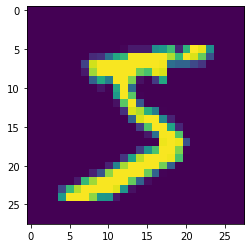

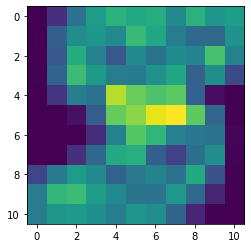

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))
plt.show()
plt.imshow(feature)
plt.show()